In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.set_printoptions(precision=3,suppress=True)

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing



In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ["MPG","Cylinders","Displacement","Horsepower","Weight","Acceleration","Model Year","Origin"]

dataset = pd.read_csv(url, names=column_names , na_values="?",comment="\t",sep=" ",skipinitialspace=True)

In [4]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [5]:
dataset=dataset.dropna()
origin=dataset.pop("Origin")
dataset["USA"]=(origin==1)*1
dataset["Europe"] = (origin==2)*1
dataset["Japan"]=(origin==3)*1

In [6]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,0,0


In [7]:
#split the data into train and test
train_dataset=dataset.sample(frac=0.8,random_state=0)
test_dataset=dataset.drop(train_dataset.index)

print(dataset.shape , train_dataset.shape , test_dataset.shape)
train_dataset.describe().transpose()

(392, 10) (314, 10) (78, 10)


,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [8]:
#split features from labels 
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop("MPG")
test_labels = test_features.pop("MPG")

In [9]:
def plot(feature , x=None , y=None):
    plt.figure(figsize=(10,8))
    plt.scatter(train_features[feature],train_labels,label="Data")
    if x is not None and y is not None:
        plt.plot(x,y,color="k",label="Predictions")
    plt.xlabel(feature)
    plt.ylabel("MPG")
    plt.legend()

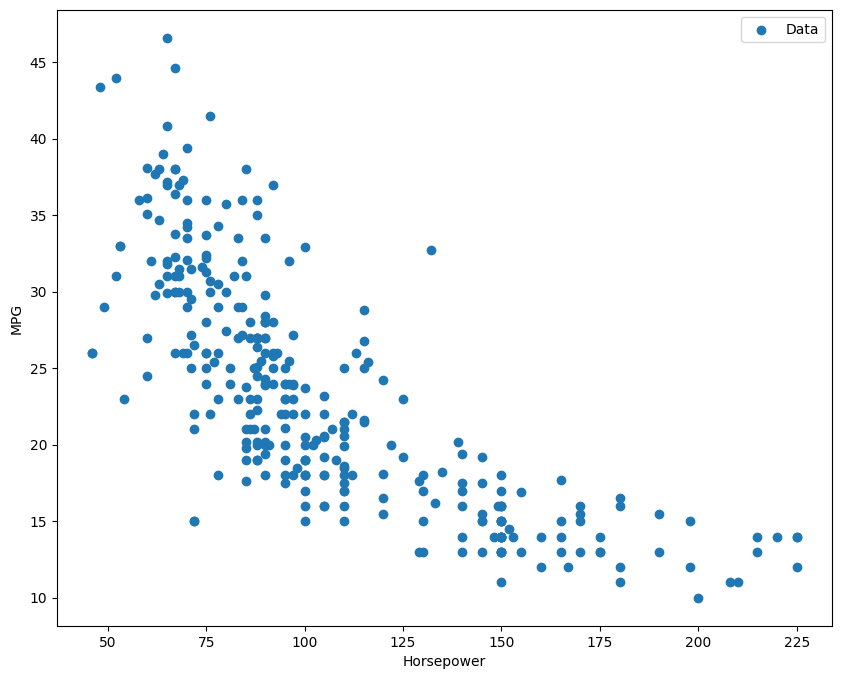

In [10]:
plot("Horsepower")

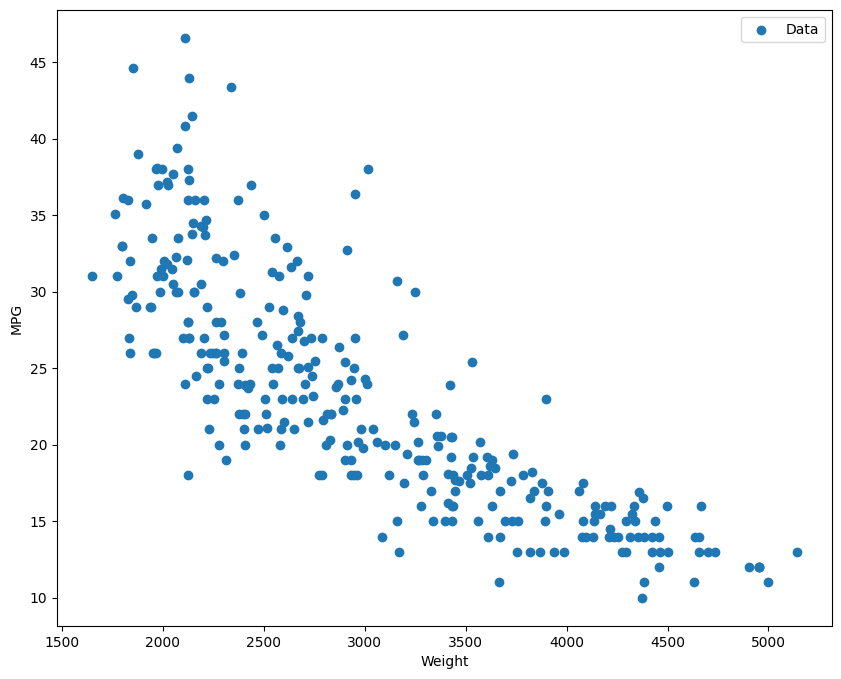

In [11]:
plot("Weight")

In [12]:
#normalize
print(train_dataset.describe().transpose()[["mean","std"]])
#normalization
normalizer = preprocessing.Normalization()
#adapt to  the data
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

                     mean         std
MPG             23.310510    7.728652
Cylinders        5.477707    1.699788
Displacement   195.318471  104.331589
Horsepower     104.869427   38.096214
Weight        2990.251592  843.898596
Acceleration    15.559236    2.789230
Model Year      75.898089    3.675642
USA              0.624204    0.485101
Europe           0.178344    0.383413
Japan            0.197452    0.398712
[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.624    0.178
     0.197]]


In [13]:
first=np.array(train_features[:1])
print("First Example",first)
print("Normalized: ",normalizer(first).numpy())


First Example [[   4.    90.    75.  2125.    14.5   74.     1.     0.     0. ]]
Normalized:  [[-0.871 -1.011 -0.785 -1.027 -0.38  -0.517  0.776 -0.466 -0.496]]


In [14]:
#Regression
# Normalize the input Horsepower
# Apply a linear regression kodel to produce 1 output using layers.Dense
feature = "Horsepower"
single_feature = np.array(train_features[feature])
print(single_feature.shape, train_features.shape)

single_feature_normalizer = layers.Normalization(input_shape=[1,], axis=None)
single_feature_normalizer.adapt(single_feature)


(314,) (314, 9)


In [15]:
#Sequential model
single_feature_model=keras.models.Sequential([
    
    single_feature_normalizer,
    layers.Dense(units=1) #linear Model 
    
])

In [16]:
single_feature_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [17]:
#loss and optimizer
loss=keras.losses.MeanAbsoluteError() # (y_p - y) -> mean squarred error
opti =keras.optimizers.Adam(learning_rate=0.1)
single_feature_model.compile(optimizer=opti, loss=loss)


In [18]:
history = single_feature_model.fit(
    
    train_features[feature],train_labels,
    epochs=100,
    verbose=1,
    validation_split = 0.2)

Epoch 1/100


C:\Users\ACER\anaconda3\envs\GPUEnv\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


8/8 [==============================] - 1s 23ms/step - loss: 22.8661 - val_loss: 22.9318
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 22.0652 - val_loss: 22.1320
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 21.2623 - val_loss: 21.3319
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 20.4636 - val_loss: 20.5319
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 19.6619 - val_loss: 19.7319
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 18.8655 - val_loss: 18.9317
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 18.0619 - val_loss: 18.1318
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 17.2631 - val_loss: 17.3319
Epoch 9/100
8/8 [==============================] - 0s 7ms/step - loss: 16.4648 - val_loss: 16.5318
Epoch 10/100
8/8 [==============================] - 0s 7ms/step - loss: 15.6637 - val_loss: 15.7319
Epoch 11/100
8/8 [==

8/8 [==============================] - 0s 6ms/step - loss: 3.8048 - val_loss: 4.1965
Epoch 85/100
8/8 [==============================] - 0s 6ms/step - loss: 3.8026 - val_loss: 4.1856
Epoch 86/100
8/8 [==============================] - 0s 6ms/step - loss: 3.8034 - val_loss: 4.1744
Epoch 87/100
8/8 [==============================] - 0s 6ms/step - loss: 3.8068 - val_loss: 4.1590
Epoch 88/100
8/8 [==============================] - 0s 6ms/step - loss: 3.8063 - val_loss: 4.1631
Epoch 89/100
8/8 [==============================] - 0s 6ms/step - loss: 3.8049 - val_loss: 4.2004
Epoch 90/100
8/8 [==============================] - 0s 7ms/step - loss: 3.8039 - val_loss: 4.1886
Epoch 91/100
8/8 [==============================] - 0s 7ms/step - loss: 3.8016 - val_loss: 4.1923
Epoch 92/100
8/8 [==============================] - 0s 6ms/step - loss: 3.8025 - val_loss: 4.1915
Epoch 93/100
8/8 [==============================] - 0s 7ms/step - loss: 3.8050 - val_loss: 4.1962
Epoch 94/100
8/8 [===============

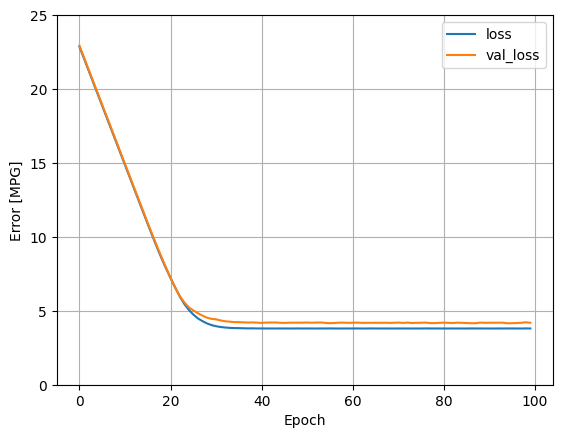

In [19]:
def plot_loss(history):
    plt.plot(history.history["loss"],label="loss")
    plt.plot(history.history["val_loss"],label="val_loss")
    plt.ylim([0,25])
    plt.xlabel("Epoch")
    plt.ylabel("Error [MPG]")
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [20]:
single_feature_model.evaluate(
    test_features[feature],
    test_labels , verbose=1)


3/3 [==============================] - 0s 2ms/step - loss: 3.6476


3.647637367248535

7/7 [==============================] - 0s 2ms/step


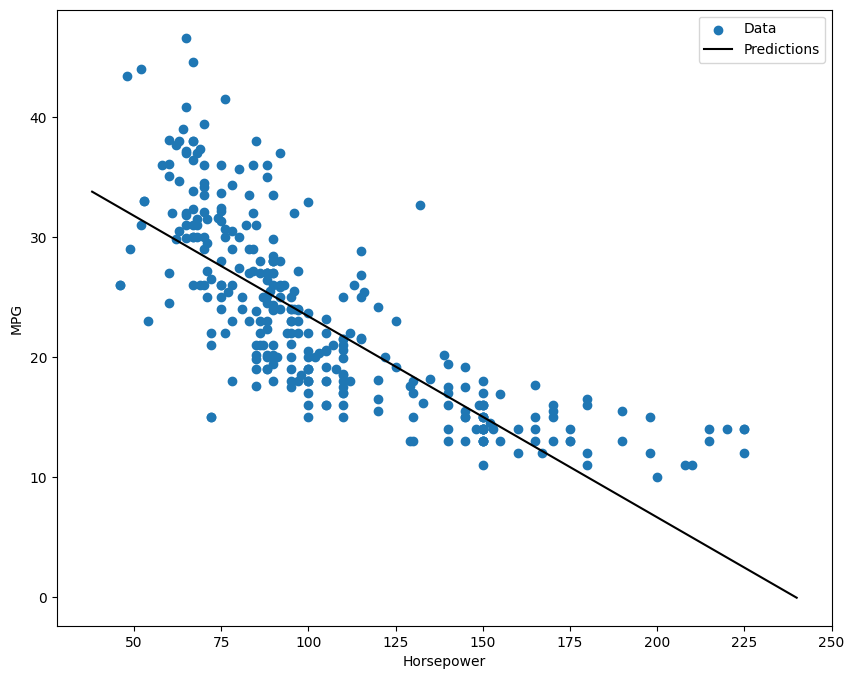

In [21]:
range_min = np.min(test_features[feature])-10
range_max = np.max(test_features[feature])+10
x = tf.linspace(range_min , range_max , 200)
y = single_feature_model.predict(x)
plot(feature, x,y)

In [22]:
#DNN
dnn_model = keras.Sequential([
    single_feature_normalizer,
    layers.Dense(64,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(1)
])

In [23]:
dnn_model.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(0.001))
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_1 (Dense)             (None, 64)                128       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [24]:
dnn_model.fit(
    
    train_features[feature],train_labels,
    validation_split=0.2,
    verbose = 1,
    epochs=100
)

Epoch 1/100
8/8 [==============================] - 0s 22ms/step - loss: 23.1709 - val_loss: 23.5512
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 22.9264 - val_loss: 23.2797
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 22.6624 - val_loss: 22.9808
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 22.3570 - val_loss: 22.6273
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 21.9840 - val_loss: 22.1744
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 21.5086 - val_loss: 21.5838
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 20.8588 - val_loss: 20.8232
Epoch 8/100
8/8 [==============================] - 0s 7ms/step - loss: 20.0519 - val_loss: 19.8439
Epoch 9/100
8/8 [==============================] - 0s 7ms/step - loss: 19.0148 - val_loss: 18.6243
Epoch 10/100
8/8 [==============================] - 0s 7ms/step - loss: 17.7469 - val_loss: 17.2215
Epoch 11

8/8 [==============================] - 0s 7ms/step - loss: 3.2667 - val_loss: 3.7971
Epoch 85/100
8/8 [==============================] - 0s 7ms/step - loss: 3.2706 - val_loss: 3.7897
Epoch 86/100
8/8 [==============================] - 0s 6ms/step - loss: 3.2570 - val_loss: 3.7754
Epoch 87/100
8/8 [==============================] - 0s 7ms/step - loss: 3.2668 - val_loss: 3.7893
Epoch 88/100
8/8 [==============================] - 0s 7ms/step - loss: 3.2540 - val_loss: 3.7700
Epoch 89/100
8/8 [==============================] - 0s 7ms/step - loss: 3.2634 - val_loss: 3.7776
Epoch 90/100
8/8 [==============================] - 0s 8ms/step - loss: 3.2592 - val_loss: 3.7722
Epoch 91/100
8/8 [==============================] - 0s 7ms/step - loss: 3.2535 - val_loss: 3.8015
Epoch 92/100
8/8 [==============================] - 0s 7ms/step - loss: 3.2772 - val_loss: 3.7882
Epoch 93/100
8/8 [==============================] - 0s 7ms/step - loss: 3.2568 - val_loss: 3.7525
Epoch 94/100
8/8 [===============

In [25]:
dnn_model.evaluate(test_features[feature],test_labels,verbose=1)

3/3 [==============================] - 0s 3ms/step - loss: 2.8769


2.876901388168335

7/7 [==============================] - 0s 3ms/step


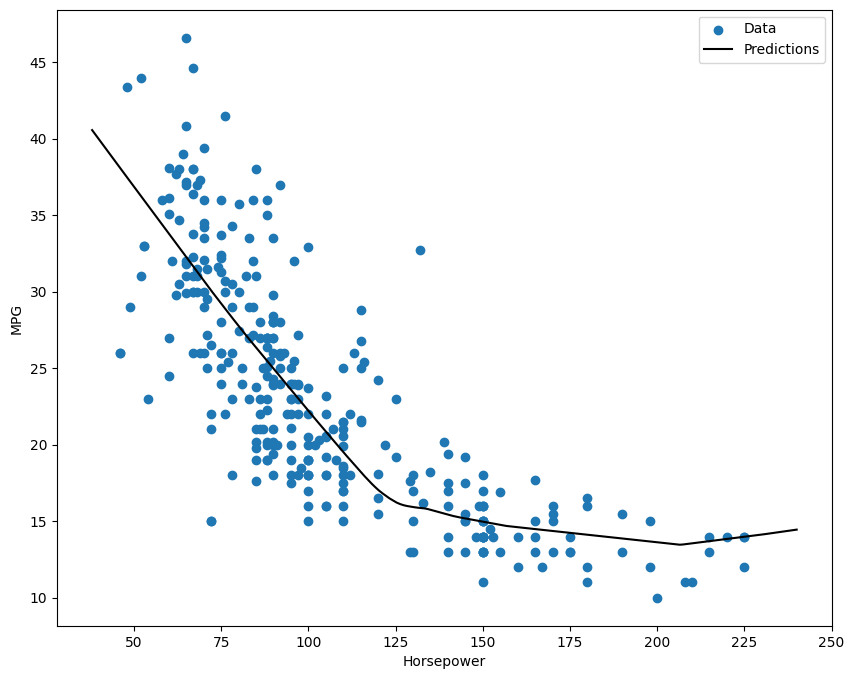

In [26]:
#predict and plot
x = tf.linspace(range_min,range_max,200)
y=dnn_model.predict(x)
plot(feature ,x,y)


In [27]:
#multiple inputs
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(2)
])

linear_model.compile(
    optimizer =tf.optimizers.Adam(learning_rate=0.1),
    loss=loss )

In [28]:
linear_model.fit(

    train_features, train_labels,
    epochs = 100,
    verbose =1,
    validation_split =0.2
    
    )

Epoch 1/100
8/8 [==============================] - 0s 20ms/step - loss: 22.9834 - val_loss: 23.0198
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 22.0686 - val_loss: 22.3089
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 21.2420 - val_loss: 21.5502
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 20.4131 - val_loss: 20.8507
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 19.5860 - val_loss: 20.1223
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 18.7655 - val_loss: 19.3934
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 17.9562 - val_loss: 18.6745
Epoch 8/100
8/8 [==============================] - 0s 8ms/step - loss: 17.1327 - val_loss: 17.9588
Epoch 9/100
8/8 [==============================] - 0s 7ms/step - loss: 16.3046 - val_loss: 17.2486
Epoch 10/100
8/8 [==============================] - 0s 7ms/step - loss: 15.5068 - val_loss: 16.5630
Epoch 11

8/8 [==============================] - 0s 7ms/step - loss: 2.4934 - val_loss: 2.4840
Epoch 85/100
8/8 [==============================] - 0s 7ms/step - loss: 2.4816 - val_loss: 2.4499
Epoch 86/100
8/8 [==============================] - 0s 6ms/step - loss: 2.5068 - val_loss: 2.4981
Epoch 87/100
8/8 [==============================] - 0s 6ms/step - loss: 2.4926 - val_loss: 2.4730
Epoch 88/100
8/8 [==============================] - 0s 7ms/step - loss: 2.4673 - val_loss: 2.4897
Epoch 89/100
8/8 [==============================] - 0s 7ms/step - loss: 2.4686 - val_loss: 2.4672
Epoch 90/100
8/8 [==============================] - 0s 6ms/step - loss: 2.4880 - val_loss: 2.5497
Epoch 91/100
8/8 [==============================] - 0s 7ms/step - loss: 2.4963 - val_loss: 2.4852
Epoch 92/100
8/8 [==============================] - 0s 8ms/step - loss: 2.4783 - val_loss: 2.4854
Epoch 93/100
8/8 [==============================] - 0s 6ms/step - loss: 2.4679 - val_loss: 2.4750
Epoch 94/100
8/8 [===============

In [29]:
linear_model.evaluate(
    test_features , test_labels , verbose =1)

3/3 [==============================] - 0s 3ms/step - loss: 2.5136


2.513589382171631